In [116]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import operator
import cv2
import sys, os
import tensorflow as tf
from sklearn import metrics
import itertools

In [117]:
loaded_model = load_model("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [118]:
# Step 2 - Preparing the train/test data and training the model

# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

batch_size = 5

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(64, 64),
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical', 
                                            shuffle=False) 


Found 99 images belonging to 7 classes.


In [119]:
# classes, read in the same order as we read from the file directories 
classes = {0: 'let', 1: 'let_l', 2: 'nolet', 3: 'nolet_l', 4: 'none', 5: 'stroke', 6: 'stroke_l'}

In [120]:
test_imgs, test_labels= next(test_set)
print(test_labels)
print(test_imgs[0].shape)
print(type(test_imgs[0]))

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
(64, 64, 1)
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'let')

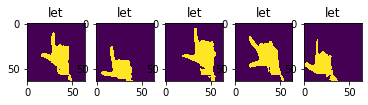

In [121]:
# print one batch
f, axarr = plt.subplots(1,5)
axarr[0].imshow(test_imgs[0].squeeze())
axarr[1].imshow(test_imgs[1].squeeze())
axarr[2].imshow(test_imgs[2].squeeze())
axarr[3].imshow(test_imgs[3].squeeze())
axarr[4].imshow(test_imgs[4].squeeze())

axarr[0].set_title(classes[np.argmax(test_labels[0], axis=-1)])
axarr[1].set_title(classes[np.argmax(test_labels[1], axis=-1)])
axarr[2].set_title(classes[np.argmax(test_labels[2], axis=-1)])
axarr[3].set_title(classes[np.argmax(test_labels[3], axis=-1)])
axarr[4].set_title(classes[np.argmax(test_labels[4], axis=-1)])

In [122]:
y_true=test_set.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6], dtype=int32)

In [123]:
predictions = loaded_model.predict(x=test_set, verbose=0)
y_pred=np.argmax(predictions, axis=-1)
cm = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)
y_pred

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3, 3, 4, 4, 4, 2, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6])

In [124]:
test_set.class_indices

{'let': 0,
 'let_l': 1,
 'nolet': 2,
 'nolet_l': 3,
 'none': 4,
 'stroke': 5,
 'stroke_l': 6}

In [125]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  0  0  0  1  3  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0  1  5  0  0  0]
 [ 1  1  1  0 17  0  0]
 [ 0  0  0  1  0 19  0]
 [ 0  0  0  0  0  0  7]]


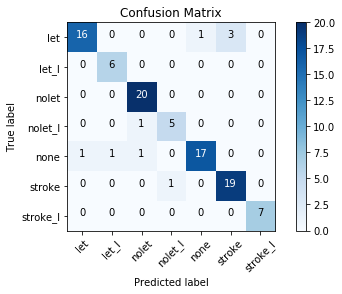

In [126]:
plot_confusion_matrix(cm=cm, classes=list(classes.values()), title="Confusion Matrix")

In [127]:
# print metrics
accuracy = metrics.accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True, sample_weight=None)
print("Accuracy: %s"% accuracy)

# precision = tp / (tp + fp)
precision = metrics.precision_score(y_true=y_true, y_pred=y_pred, average=None)
print("Precision: %s"% precision)

# recall = tp / (tp + fn)
recall = metrics.recall_score(y_true=y_true, y_pred=y_pred, average=None)
print("Recall: %s"% recall)

Accuracy: 0.9090909090909091
Precision: [0.94117647 0.85714286 0.90909091 0.83333333 0.94444444 0.86363636
 1.        ]
Recall: [0.8        1.         1.         0.83333333 0.85       0.95
 1.        ]


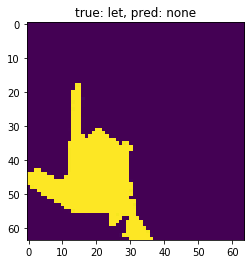

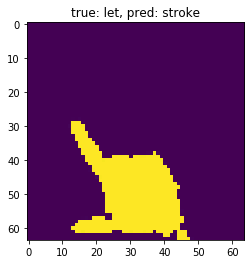

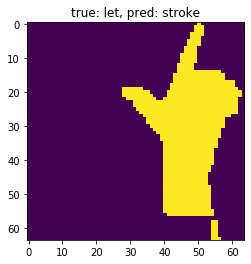

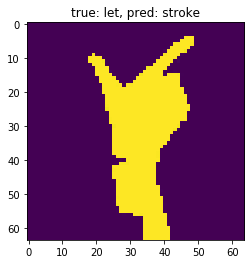

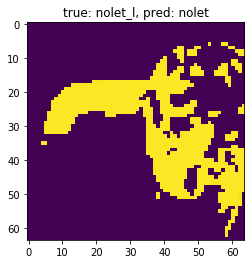

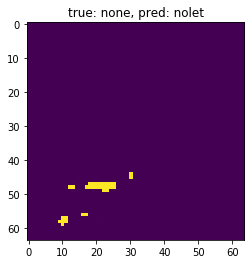

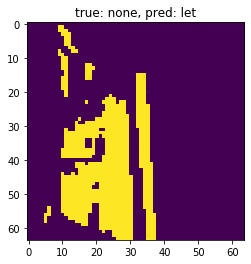

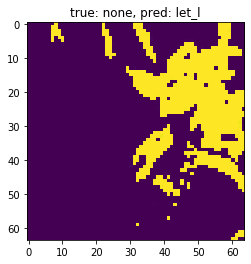

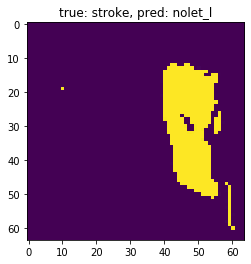

In [128]:
# show wrong predictions 

for i, label in enumerate(zip(y_true, y_pred)):
    true = label[0]
    pred = label[1]
    if true != pred:
        img = np.array(test_set[i // 5][0][i % 5])
        imgplot = plt.imshow(img.squeeze())
        plt.title("true: %s, pred: %s"% (classes[true], classes[pred]))
        plt.show()

### Snapshot: 10/21
Accuracy: 0.9625

Precision: [0.90909091 1.         0.94736842 1.        ]

Recall: [1.   1.   0.9  0.95]

### Snapshot: 10/22
Added in lefty Lets

Accuracy: 0.8625

Precision: [0.92307692 0.90909091 0.95       0.72      ]

Recall: [0.6  1.   0.95 0.9 ]

### Snapshot: 10/28
Added in lefty classes

Accuracy: 0.9090909090909091

Precision: [0.94117647 0.85714286 0.90909091 0.83333333 0.94444444 0.86363636 1.        ]

Recall: [0.8        1.         1.         0.83333333 0.85       0.95 1.        ]